**Data Analysis and Visualization**

In this section, the results obtained in "model_run" will be analyzed and visualized.

In [24]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D


**Upload Necessary Data**

In [30]:
# upload the data with the following code
# change the file name to the file you want to load
model_dataframe_initial = pd.read_csv(f"../result_1/{'model_results_no_subsidy'}.csv")
#agent_dataframe_initial = pd.read_csv(f"../result_1/{'agent_results_no_subsidy'}.csv")
print(type(model_dataframe_initial))

model_dataframe_income_threshold = pd.read_csv(f"../result_1/{'model_sensitivity_results_income_threshold'}.csv")
model_dataframe_saving_threshold = pd.read_csv(f"../result_1/{'model_sensitivity_results_saving_threshold'}.csv")
model_dataframe_subsidy_rate = pd.read_csv(f"../result_1/{'model_sensitivity_results_subsidy_rate'}.csv")
model_dataframe_flood_prob = pd.read_csv(f"../result_1/{'model_sensitivity_results_flood_prob'}.csv")
# # Concatenating the dataframes
# merged_dataframe = pd.concat([
#     model_dataframe_income_threshold,
#     model_dataframe_saving_threshold,
#     model_dataframe_subsidy_rate,
#     model_dataframe_flood_prob
# ], ignore_index=True)



<class 'pandas.core.frame.DataFrame'>


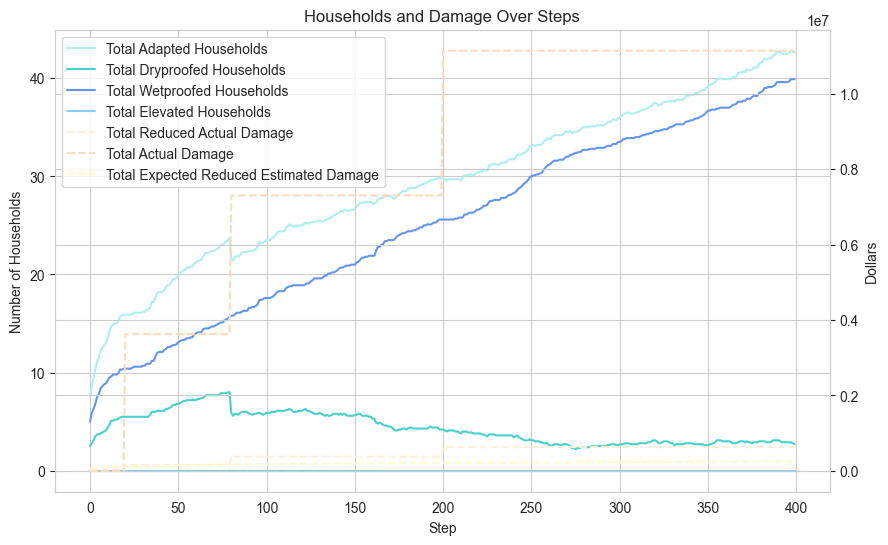

In [31]:

# Assuming you already have the grouped_data DataFrame from previous code
grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()
# Define warm and cold colors
warm_colors = ['PapayaWhip', 'PeachPuff', 'LemonChiffon']
cold_colors = ['PaleTurquoise', 'MediumTurquoise', 'CornflowerBlue', 'LightSkyBlue']

# Create the line chart with dual Y-axes and custom colors
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Lines on the left Y-axis (number of households) with cold colors
ax1.plot(grouped_data['Step'], grouped_data['total_adapted_households'], label='Total Adapted Households', linestyle='-', color=cold_colors[0])
ax1.plot(grouped_data['Step'], grouped_data['total_dryproofed_households'], label='Total Dryproofed Households', linestyle='-', color=cold_colors[1])
ax1.plot(grouped_data['Step'], grouped_data['total_wetproofed_households'], label='Total Wetproofed Households', linestyle='-', color=cold_colors[2])
ax1.plot(grouped_data['Step'], grouped_data['total_elevated_households'], label='Total Elevated Households', linestyle='-', color=cold_colors[3])

# Lines on the right Y-axis (in dollars) with warm colors
ax2.plot(grouped_data['Step'], grouped_data['total_reduced_actual_damage'], label='Total Reduced Actual Damage', linestyle='--', color=warm_colors[0])
ax2.plot(grouped_data['Step'], grouped_data['total_actual_damage'], label='Total Actual Damage', linestyle='--', color=warm_colors[1])
ax2.plot(grouped_data['Step'], grouped_data['total_expected_reduced_estimated_damage'], label='Total Expected Reduced Estimated Damage', linestyle='--', color=warm_colors[2])

# Add labels and title
ax1.set_xlabel('Step')
ax1.set_ylabel('Number of Households')
ax2.set_ylabel('Dollars')
plt.title('Households and Damage Over Steps')

# Show the legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels)

# Show the grid
ax1.grid(True)

# Display the chart
plt.show()

In [33]:
def load_and_filter_dataframe(file_path, step=399):
    df = pd.read_csv(file_path)
    return df[df['Step'] == step]

def calculate_statistics(dataframe, column_name, parameter_name, parameter_values):
    results = {}
    for value in parameter_values:
        filtered_df = dataframe[dataframe[parameter_name] == value]
        mean_val = filtered_df[column_name].mean()
        max_val = filtered_df[column_name].max()
        min_val = filtered_df[column_name].min()
        results[value] = [mean_val, max_val, min_val]
    return results

# Define the file paths and parameters
file_paths = {
    "income_threshold": "../result_1/model_sensitivity_results_income_threshold.csv",
    "saving_threshold": "../result_1/model_sensitivity_results_saving_threshold.csv",
    "subsidy_rate": "../result_1/model_sensitivity_results_subsidy_rate.csv",
    "flood_prob": "../result_1/model_sensitivity_results_flood_prob.csv"
}

parameter_column_names = {
    "income_threshold": "income_threshold",
    "saving_threshold": "rate",
    "subsidy_rate": "subsidy_rate",
    "flood_prob": "flood_probability"
}

parameters = {
    "income_threshold": [3600, 4000, 4400],
    "saving_threshold": [0.45, 0.5, 0.55],
    "subsidy_rate": [0.45, 0.5, 0.55],
    "flood_prob": [0.063, 0.07, 0.077]
}

{'income_threshold': {3600: [245613.41947046173, 325752.46024446393, 190869.8363302123], 4000: [250209.52705979446, 326952.1882100428, 199998.97183195583], 4400: [253744.35360692703, 328119.7621331632, 204798.8077408618]}, 'saving_threshold': {0.45: [357262.2519543209, 449676.4290369182, 287223.84143572394], 0.5: [250209.52705979446, 326952.1882100428, 199998.97183195583], 0.55: [175659.04062205518, 239138.92241389464, 135610.1797629109]}, 'subsidy_rate': {0.45: [246376.7552839297, 324750.85642252595, 194572.2770195864], 0.5: [250209.52705979446, 326952.1882100428, 199998.97183195583], 0.55: [253681.8094671174, 332468.6477948232, 200156.81830297672]}, 'flood_prob': {0.063: [223224.2224608153, 295006.2192316628, 176668.73803389087], 0.07: [250209.52705979446, 326952.1882100428, 199998.97183195583], 0.077: [281374.5551802438, 358957.85404054256, 225130.6988733268]}}


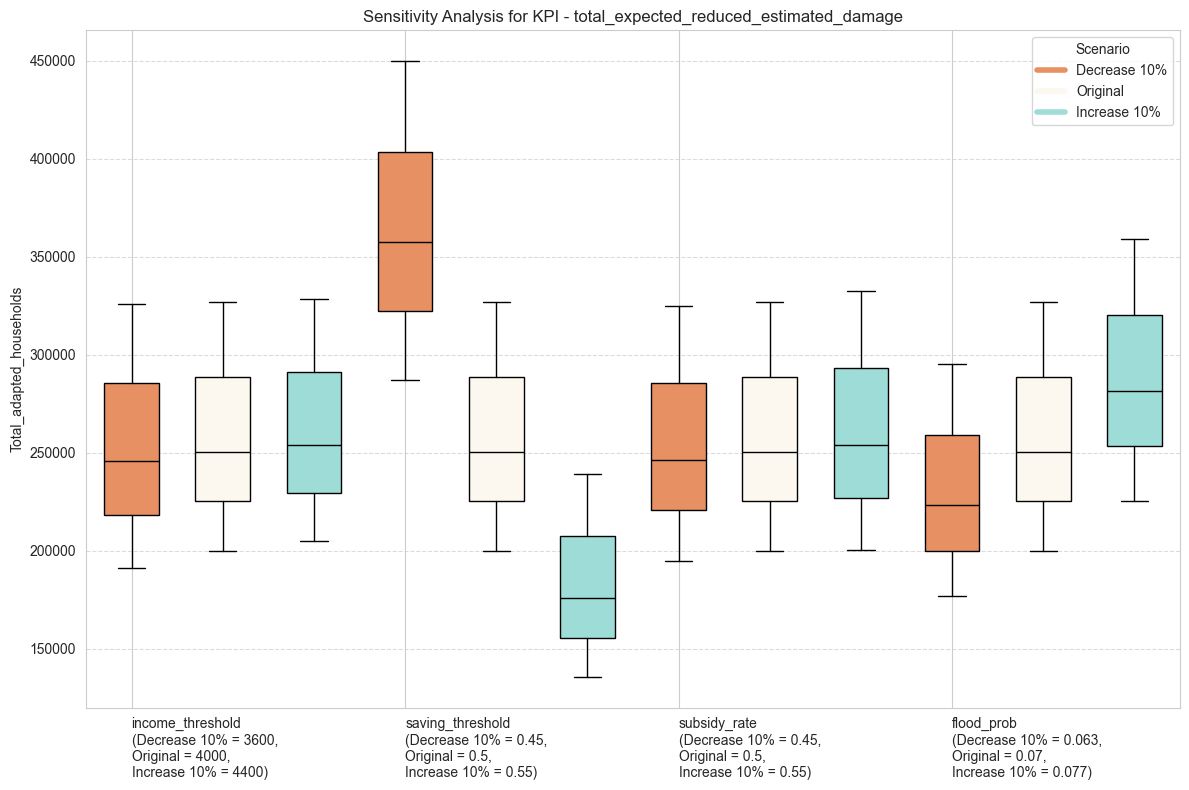

In [39]:
# Initialize a dictionary to store all results
data_TERED = {}

# Loop through each DataFrame and calculate statistics
for key, file_path in file_paths.items():
    df = load_and_filter_dataframe(file_path)
    parameter_name = parameter_column_names[key]
    statistics = calculate_statistics(df, 'total_expected_reduced_estimated_damage', parameter_name, parameters[key])
    data_TERED[key] = statistics

# Now 'data_TERED' contains all the results in the desired format
print(data_TERED)

# Define new colors and labels
colors = ['#e79063', '#fcf8f0', '#9edcd8']
scenario_labels = ['Decrease 10%', 'Original', 'Increase 10%']

# Create the box-whisker chart
fig, ax = plt.subplots(figsize=(12, 8))
positions = np.array(range(len(data_TERED)*len(scenario_labels)))

# Plot each boxplot with a different color
for i, (variable, scenarios) in enumerate(data_TERED.items()):
    for j, (level, values) in enumerate(scenarios.items()):
        idx = i*len(scenario_labels) + j
        box = ax.boxplot(values, positions=[positions[idx]], widths=0.6, patch_artist=True, showfliers=True,
                         flierprops=dict(marker='o', color=colors[j], markersize=5))
        plt.setp(box['boxes'], facecolor=colors[j])
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['caps'], color='black')
        plt.setp(box['medians'], color='black')

# Set the labels for the x-ticks
group_labels = [f'{variable}\n({scenario_labels[0]} = {list(scenarios.keys())[0]},'
                f'\nOriginal = {list(scenarios.keys())[1]},'
                f'\n{scenario_labels[2]} = {list(scenarios.keys())[2]})' for variable, scenarios in data_TERED.items()]
ax.set_xticks(range(0, len(data_TERED)*len(scenario_labels), len(scenario_labels)))
ax.set_xticklabels(group_labels, rotation=0, ha="left")

# Set the axis labels and title
ax.set_ylabel('Total_adapted_households')
ax.set_title('Sensitivity Analysis for KPI - total_expected_reduced_estimated_damage')

# Add a custom legend
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for color, label in zip(colors, scenario_labels)]
ax.legend(handles=legend_elements, title='Scenario')

# Grid and layout settings
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()



{'income_threshold': {3600: [41.2, 52, 32], 4000: [42.6, 53, 35], 4400: [43.6, 53, 36]}, 'saving_threshold': {0.45: [52.1, 64, 44], 0.5: [42.6, 53, 35], 0.55: [34.4, 46, 27]}, 'subsidy_rate': {0.45: [41.5, 52, 32], 0.5: [42.6, 53, 35], 0.55: [43.2, 55, 35]}, 'flood_prob': {0.063: [36.9, 45, 29], 0.07: [42.6, 53, 35], 0.077: [47.9, 61, 37]}}


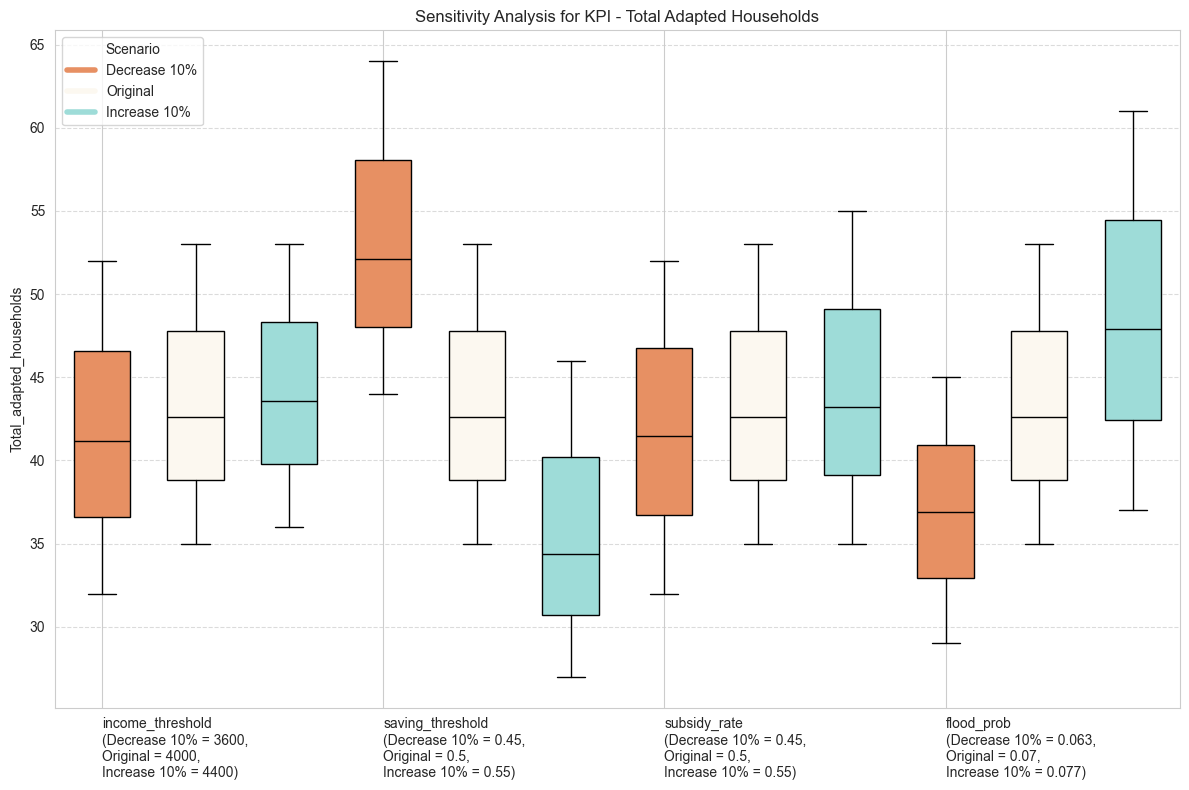

In [37]:
# Initialize a dictionary to store all results
data_TAH = {}

# Loop through each DataFrame and calculate statistics
for key, file_path in file_paths.items():
    df = load_and_filter_dataframe(file_path)
    parameter_name = parameter_column_names[key]
    statistics = calculate_statistics(df, 'total_adapted_households', parameter_name, parameters[key])
    data_TAH[key] = statistics

# Now 'data_TAH' contains all the results in the desired format
print(data_TAH)

# Define new colors and labels
colors = ['#e79063', '#fcf8f0', '#9edcd8']
scenario_labels = ['Decrease 10%', 'Original', 'Increase 10%']

# Create the box-whisker chart
fig, ax = plt.subplots(figsize=(12, 8))
positions = np.array(range(len(data_TAH)*len(scenario_labels)))

# Plot each boxplot with a different color
for i, (variable, scenarios) in enumerate(data_TAH.items()):
    for j, (level, values) in enumerate(scenarios.items()):
        idx = i*len(scenario_labels) + j
        box = ax.boxplot(values, positions=[positions[idx]], widths=0.6, patch_artist=True, showfliers=True,
                         flierprops=dict(marker='o', color=colors[j], markersize=5))
        plt.setp(box['boxes'], facecolor=colors[j])
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['caps'], color='black')
        plt.setp(box['medians'], color='black')

# Set the labels for the x-ticks
group_labels = [f'{variable}\n({scenario_labels[0]} = {list(scenarios.keys())[0]},'
                f'\nOriginal = {list(scenarios.keys())[1]},'
                f'\n{scenario_labels[2]} = {list(scenarios.keys())[2]})' for variable, scenarios in data_TAH.items()]
ax.set_xticks(range(0, len(data_TAH)*len(scenario_labels), len(scenario_labels)))
ax.set_xticklabels(group_labels, rotation=0, ha="left")

# Set the axis labels and title
ax.set_ylabel('Total_adapted_households')
ax.set_title('Sensitivity Analysis for KPI - Total Adapted Households')

# Add a custom legend
legend_elements = [Line2D([0], [0], color=color, lw=4, label=label) for color, label in zip(colors, scenario_labels)]
ax.legend(handles=legend_elements, title='Scenario')

# Grid and layout settings
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()